# Exploratory Data Analysis of Employee Data

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv("myexcel - myexcel.csv.csv")

In [9]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


# Data Preprocessing

#### 1. Analysing the dataset

In [10]:
df=pd.read_csv("myexcel - myexcel.csv.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


### Data Story

##### The whole dataset has a total of 458 rows and 9 columns. The columns include Name, Team , Number , Position ,  Age, Height, Weight, College, Salary

#### 2. Replacing values of column "Height"

In [11]:
random_values = np.random.randint(150,180, size=len(df))
df["Height"]=random_values

In [12]:
df["Height"]

0      168
1      167
2      161
3      170
4      153
      ... 
453    178
454    160
455    177
456    151
457    167
Name: Height, Length: 458, dtype: int32

#### Data Story

##### Since the values of column "Height" is incorrect, we are replacing the values with random numbers between 150 and 180 using the random.randint() function from the numpy module

#### 3. Checking columns with null values

In [13]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

#### Data Story

##### 2 Coulmns i.e; College and Salary is having a total of 84 and 11 null values respectively. So this needs to be replaced by any values preferrably mean median or mode

#### 4. Replacing null values 

In [14]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [15]:
df['College'] = df['Salary'].fillna("Unknown")

In [16]:
df.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

#### Data Story

##### Replaced null values in the column "salary" with the median values . Also replaced null values in the column "College" with the word "unknown"

#### 5. Finding duplicate rows

In [17]:
duplicate = df[df.duplicated()]

In [18]:
duplicate

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


#### Data Story

##### There are no duplicate rows in the entire dataset

#### Finding unique values in column "Team" and "Position"

In [19]:
df["Team"].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [20]:
df["Position"].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

#### Data Story

##### Found the unique values in the 2 columns "Team" and "Position"

# 1. How many are there in each Team and the percentage splitting with respect to the total employees.

In [21]:
df1=pd.DataFrame({"Counts":df.Team.value_counts()}).reset_index()
df1['Short'] = df1['Team'].apply(lambda x: ''.join(word[0] for word in x.split()))
df1

,Team,Counts,Short
0,New Orleans Pelicans,19,NOP
1,Memphis Grizzlies,18,MG
2,Utah Jazz,16,UJ
3,New York Knicks,16,NYK
4,Milwaukee Bucks,16,MB
5,Brooklyn Nets,15,BN
6,Portland Trail Blazers,15,PTB
7,Oklahoma City Thunder,15,OCT
8,Denver Nuggets,15,DN
9,Washington Wizards,15,WW


#### Data Story

##### We calculated the total number of employees in each team and created an abbreviation for each team name so that it will be easier for data 

##### visualization. We then created a new data frame called "df1" to store only the required data i.e; Team name, abbreviation, and the no. of

##### employees in each team

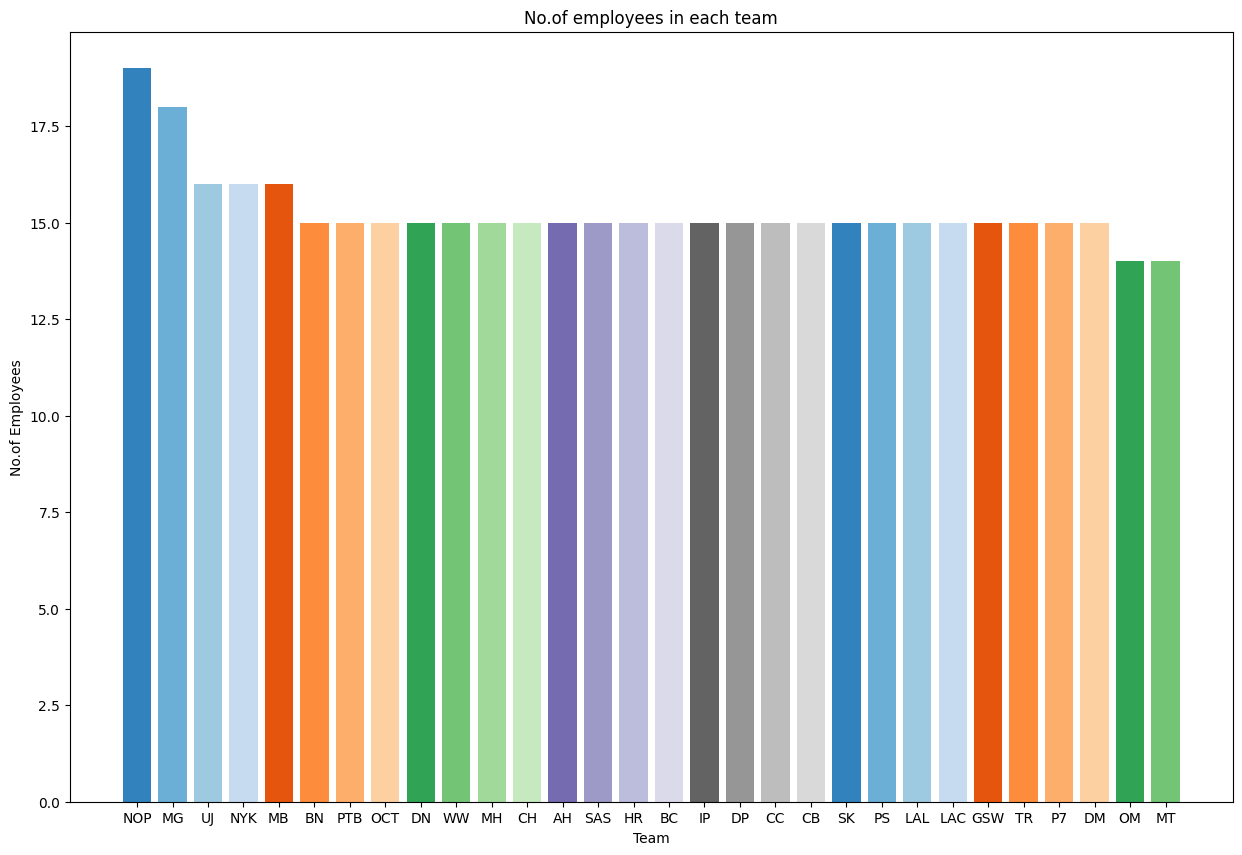

In [36]:
plt.figure(figsize=(15, 10))
plt.bar(df1["Short"],df1["Counts"],color=plt.cm.tab20c.colors)
plt.title("No.of employees in each team")
plt.xlabel("Team")
plt.ylabel("No.of Employees")
plt.show()

#### Data Story

##### We used bar chart to visualize the total employees in each team. x-axis is used to represent the team name and the y-axis represents the total

##### no.of employees

In [23]:
df1["Percentage"] = (df1["Counts"]/df1["Counts"].sum())*100
df1

,Team,Counts,Short,Percentage
0,New Orleans Pelicans,19,NOP,4.148472
1,Memphis Grizzlies,18,MG,3.930131
2,Utah Jazz,16,UJ,3.493450
3,New York Knicks,16,NYK,3.493450
4,Milwaukee Bucks,16,MB,3.493450
5,Brooklyn Nets,15,BN,3.275109
6,Portland Trail Blazers,15,PTB,3.275109
7,Oklahoma City Thunder,15,OCT,3.275109
8,Denver Nuggets,15,DN,3.275109
9,Washington Wizards,15,WW,3.275109


#### Data Story

##### We created a new column called "Percentages" which shows the percentage split of employees. It is calculated by dividing the count of employees
##### in one team with the total no. of employees and then multiplied by 100 to get the percentage value

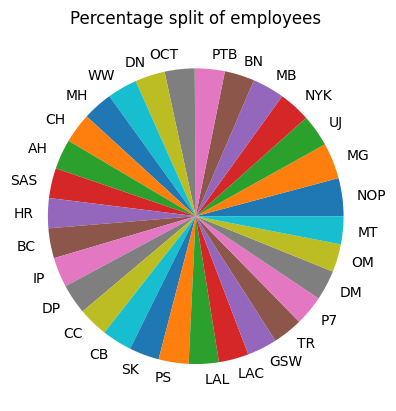

In [24]:
plt.pie(df1['Percentage'],labels=df1['Short'])
plt.title("Percentage split of employees")
plt.show()

#### Data story

##### After calculation of percentage we used a pie chart for the visualization of the percentage split. 

# 2. Segregate the employees w.r.t different positions.

In [25]:
df["Position"].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

#### Data Story

##### The above code shows how many different positions are available. So in our current dataset there are 5 different positions.
##### which are PG, SF, SG, PF , C. now we have to seggregate the total employees with respect to these 5 different categories

In [26]:
df2=pd.DataFrame({"Counts":df.Position.value_counts()}).reset_index()
df2

,Position,Counts
0,SG,102
1,PF,100
2,PG,92
3,SF,85
4,C,79


#### Data Story

##### Based on the above output we have observed the no.of employees in each category

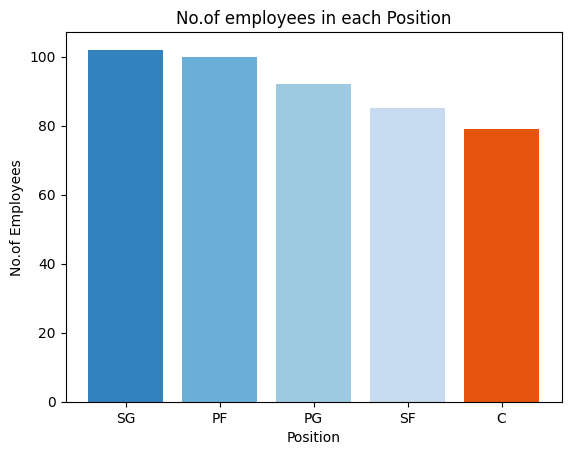

In [35]:
plt.bar(df2["Position"],df2["Counts"],color=plt.cm.tab20c.colors)
plt.title("No.of employees in each Position")
plt.xlabel("Position")
plt.ylabel("No.of Employees")
plt.show()

#### Data Story

##### We have used a bar plot to visualise the total no. of employees within each position. x-axis represents the position category and y-axis 

##### represents the no. of employees

# 3. Find from which age group most of the employees belong to.

In [28]:
df3=pd.DataFrame({"Counts":df.Age.value_counts()}).reset_index()
df3

,Age,Counts
0,24,47
1,25,46
2,27,41
3,23,41
4,26,36
5,28,31
6,30,31
7,29,28
8,22,26
9,31,22


#### Data Story

##### We have created a dataframe called df3 with "age" and the no.of employees in each age category as 2 columns. 

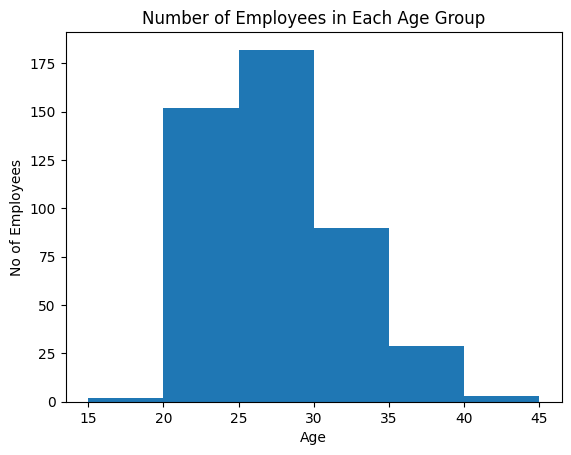

In [29]:
plt.hist(df['Age'], bins = [15,20,25,30,35,40,45]) 
plt.xlabel('Age')
plt.ylabel('No of Employees')
plt.title('Number of Employees in Each Age Group')
plt.show()

#### Data Story

##### We have used a histogram to plot the no. of emplyees within each age category with x axis representing Age category and y-axis "No. of employees".

##### From the above plot it is clear that maximum no. of employees are within the age group of 25-30

# 4. Find out under which team and position, spending in terms of salary is high.

In [32]:
grouped_df = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Salary', ascending=False)
sorted_df['Abbreviation'] = sorted_df['Team'].apply(lambda x: ''.join(word[0] for word in x.split()))
sorted_df

,Team,Position,Salary,Abbreviation
67,Los Angeles Lakers,SF,31866445.0,LAL
75,Miami Heat,PF,31538671.0,MH
53,Houston Rockets,SG,28122883.0,HR
116,Phoenix Suns,PG,28002998.0,PS
37,Denver Nuggets,SF,27982771.0,DN
...,...,...,...,...
82,Milwaukee Bucks,SF,3104287.0,MB
112,Philadelphia 76ers,SF,1845059.0,P7
125,Sacramento Kings,PF,1370152.0,SK
74,Miami Heat,C,981348.0,MH


#### Data Story

##### We have created a data frame with the columns Team, Position, Salary, Abbreviation. The column "Salary" displays the sum of salaries of all 

##### employees of a particular position within a team. The data is displayed in descending order with respect to the values in "Salary"

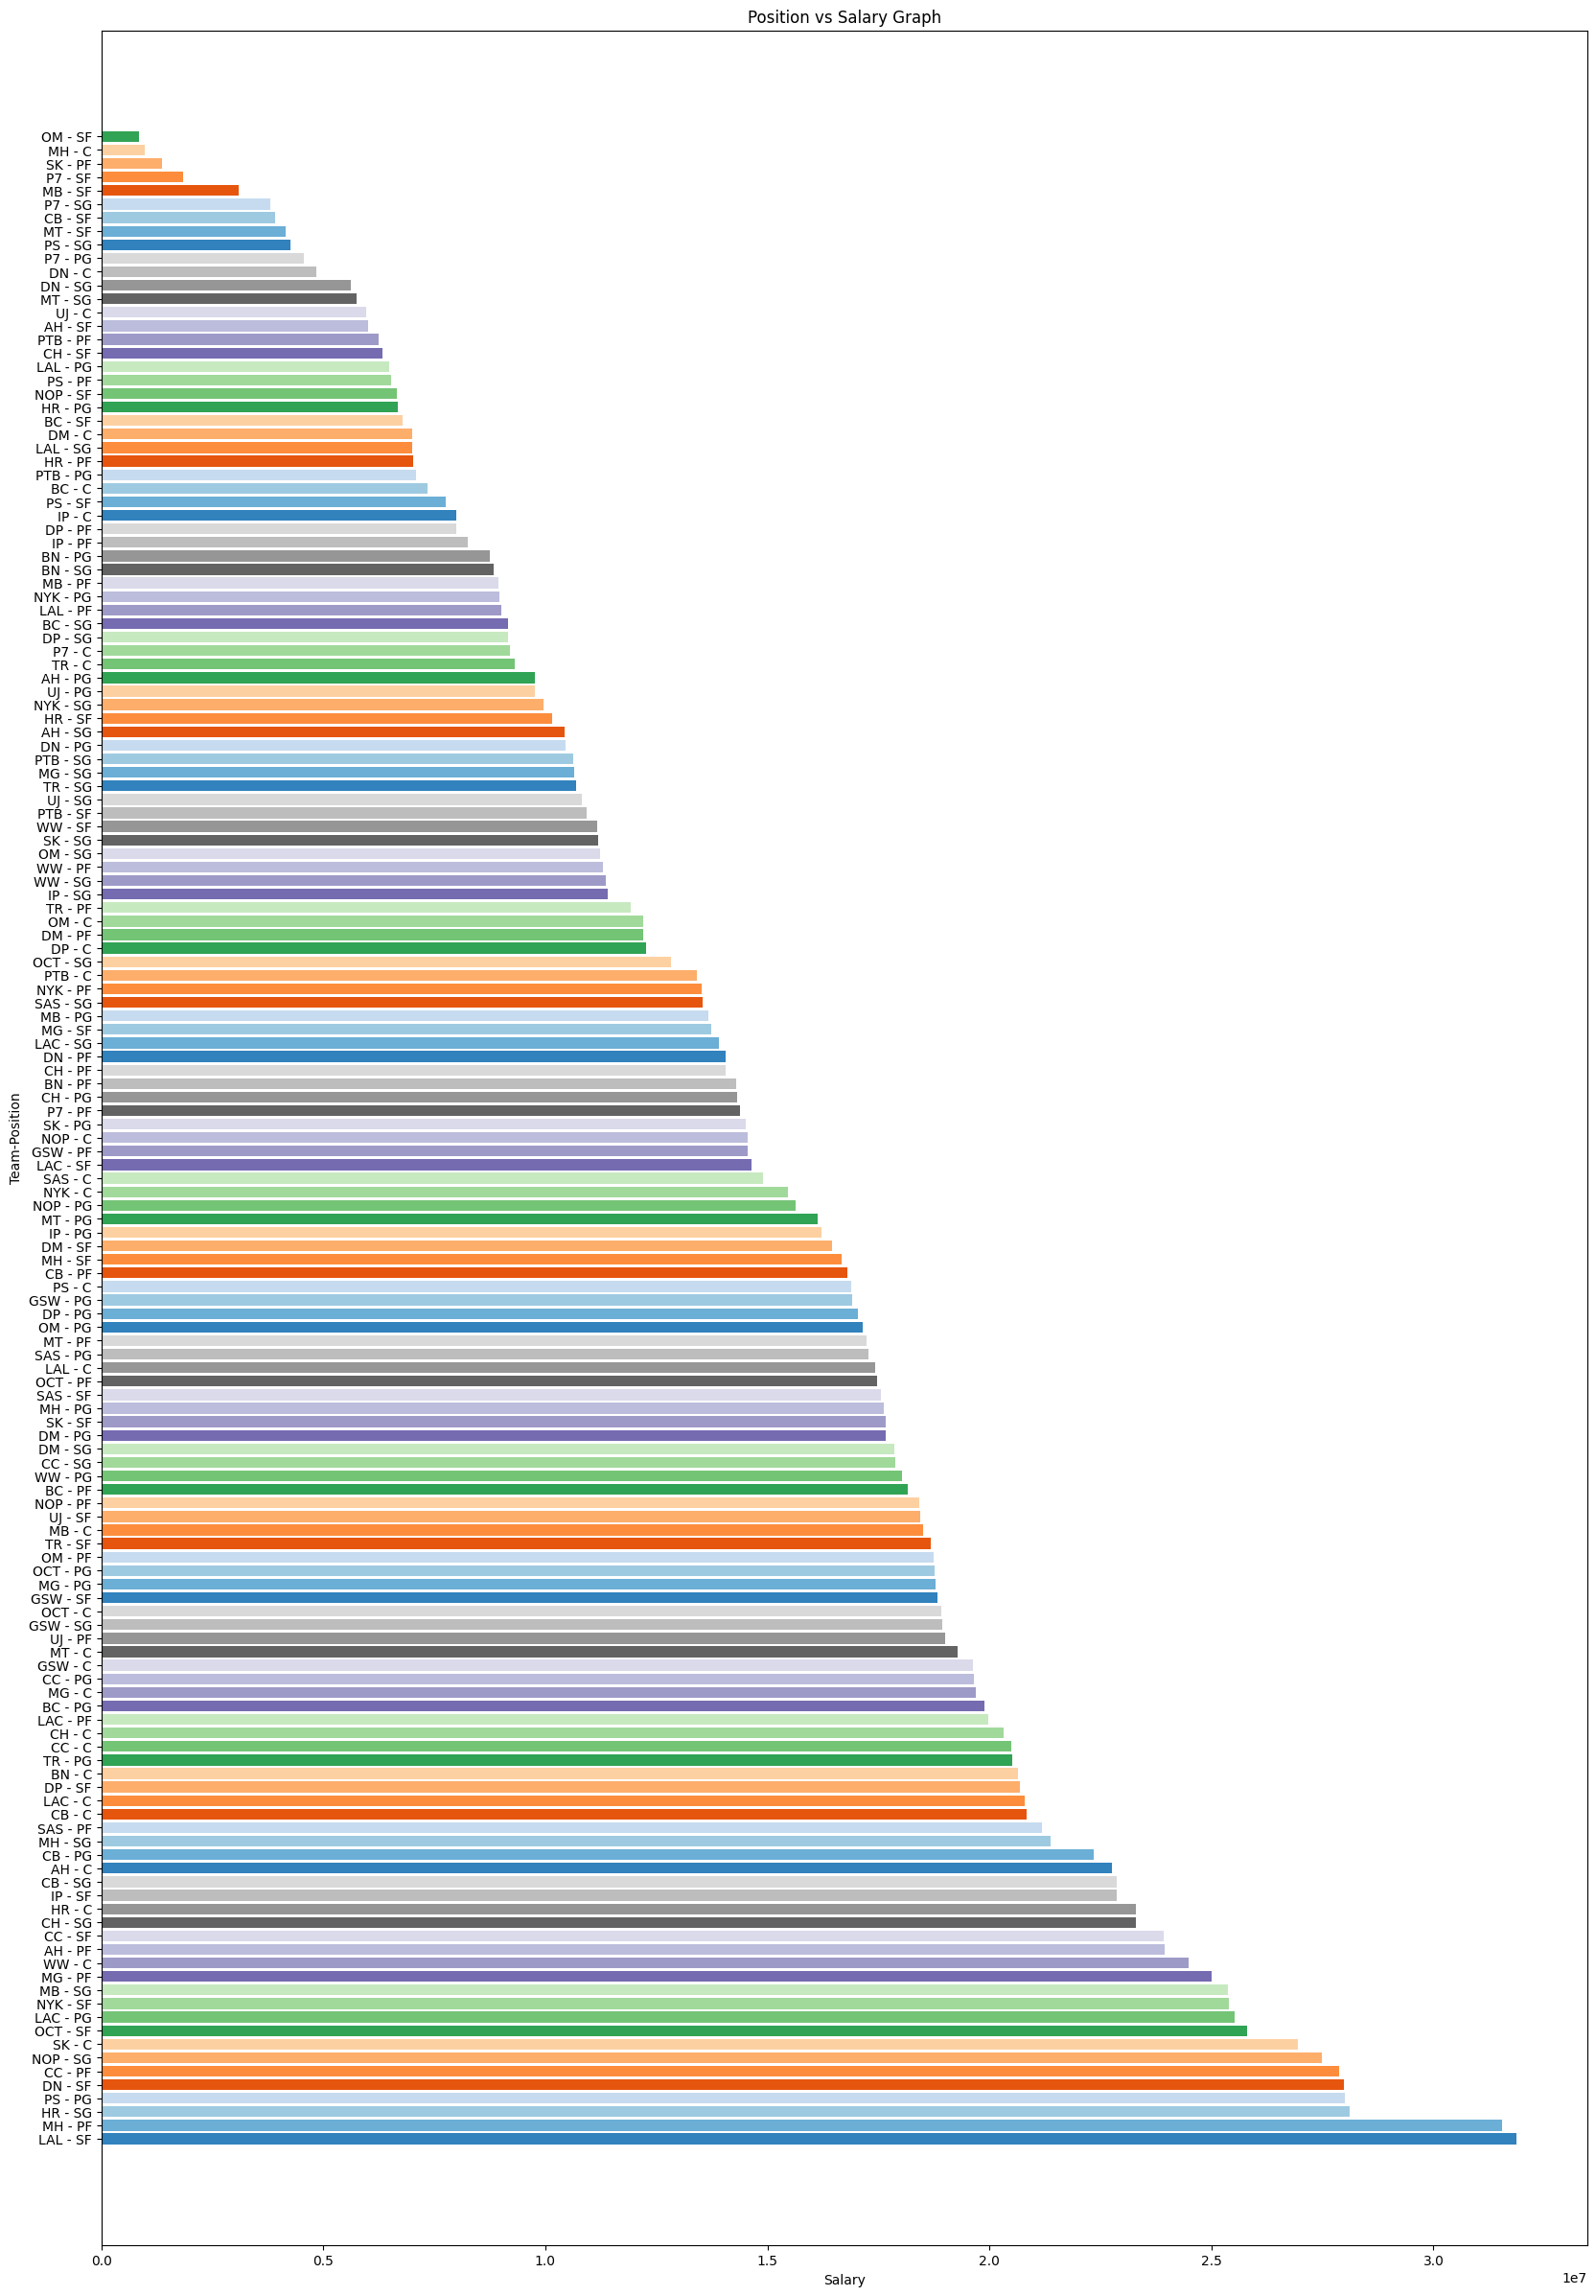

In [34]:
plt.figure(figsize=(20, 30))
plt.barh(y=sorted_df['Abbreviation'] + ' - ' + sorted_df['Position'],width=sorted_df['Salary'],color=plt.cm.tab20c.colors)
plt.xlabel('Salary')
plt.ylabel('Team-Position')
plt.title('Position vs Salary Graph')
plt.show()

#### Data Story

##### The above figure is a bar graph representation of Position within a team and the salary. Y axis represents each position in the team and X axis 

##### represents the salary

# 5. Find if there is any correlation between age and salary , represent it visually.


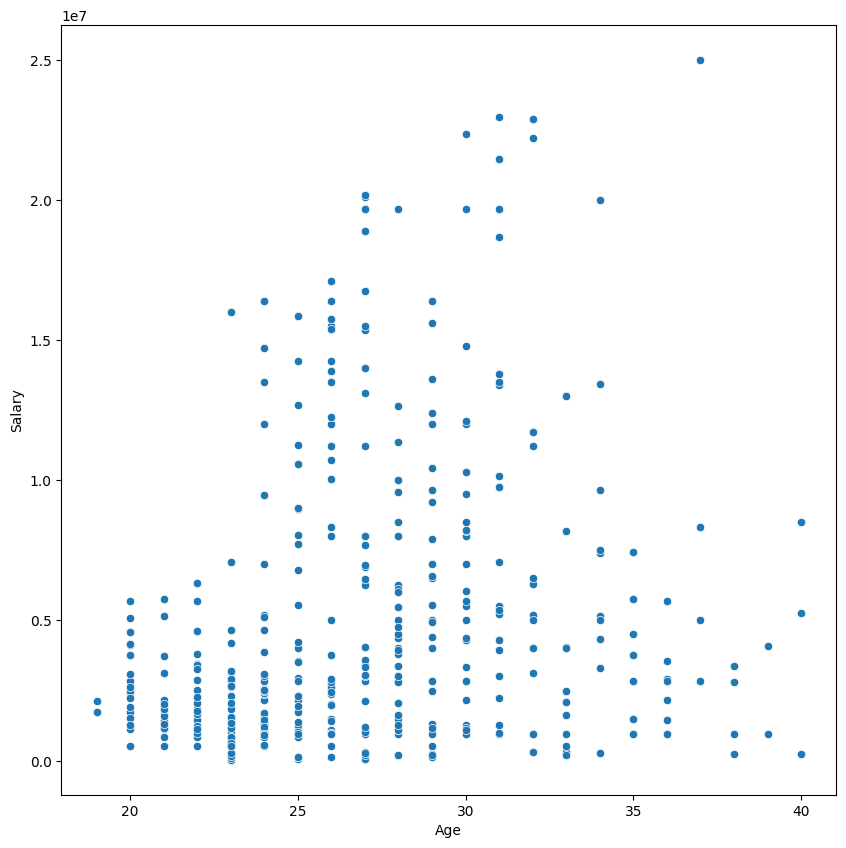

In [52]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.show()

#### Data Story

##### Used a Scatter plot to represent the correlation between Age and Salary

# Results and observations

## Data Preprocessing

##### 1. Used info() method to get details regarding the dataset and the following observations were made. It has 458 rows and 9 columns (Name, Team ,

##### Number , Position , Age, Height, Weight, College, Salary). The columns "College" and "Salary" is having few null values. The rest of the columns 

##### has no null values.

##### 2. Replaced the values in column "Height" since all the values are incorrect. Replaced the existing values with random values between 150 and 180

##### 3. Checked for null values in the dataset and displayed the total no. of null values in each column. It was observed that the columns, "College" 

##### and "Salary" is having 84 and 11 null values respectively

##### 4. Replaced all null values with the median values of respective columns

## Data Visualisation

##### 1. Created a data frame with the following columns : Team and Count. Count shows the no. of employees in each team. Plotted a bar graph to 

##### visualize the same. It was observed that the team "New Orleans Pelicans" has the highest number of employees

##### 2. Percentage split of employees among the team is calculated by taking the count of employees within a team divided by total no. of employees 

##### multiplied by 100. A pie chart is used to visualize the same. It is observed that employees at New Orleans Pelicans comprises of almost 4% of 

##### total employee strength

##### 3. Calculated the no. of employees in each position. Used a bar graph to visualize the same. It is observed that majority of employees belong to 

##### the position "SG"

##### 4. Calculated the counts of employees of each age group. Created a data frame to display the same and also used a histogram to visually represent 

##### it. It was observed that most of employees belong to age group 24-30

##### 5. Created a dataframe by grouping "Team" and "Position" and found the sum of salaries of employees in the same position within a team. This data 

##### is visualized using a bar graph and it is observed that in terms of salary , "SF" position in the team "Los Angeles Lakers " spends the highest.

##### 6. Plotted a correlation graph to show the relation between Age and Salary. No particulat relation is observed between Age and Salary of an 

##### employee. Most of employee salary ranges below 1,00,00,000